In [ ]:
Employee Satisfaction 
What departments or managers have the most employee satisfaction?
Is employee satisfaction associated with reasons for leaving?


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import data
hr_data = pd.read_csv("../data/HRDataset.csv")


In [4]:
## view first 5 rows of your data
hr_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [21]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [22]:
# Select only relevant columns
satisfaction = hr_data[["Department", "ManagerName", "EmpSatisfaction", "TermReason", "Termd"]]
satisfaction

,Department,ManagerName,EmpSatisfaction,TermReason,Termd
0,Production,Michael Albert,5,N/A-StillEmployed,0
1,IT/IS,Simon Roup,3,career change,1
2,Production,Kissy Sullivan,3,hours,1
3,Production,Elijiah Gray,5,N/A-StillEmployed,0
4,Production,Webster Butler,4,return to school,1
...,...,...,...,...,...
306,Production,Kissy Sullivan,4,N/A-StillEmployed,0
307,Production,Brannon Miller,2,Another position,1
308,IT/IS,Janet King,5,N/A-StillEmployed,0
309,IT/IS,Simon Roup,3,N/A-StillEmployed,0


In [23]:
#Identify null values
satisfaction.isnull().sum()

Department         0
ManagerName        0
EmpSatisfaction    0
TermReason         0
Termd              0
dtype: int64

In [28]:
satisfaction["EmpSatisfaction"].mean().round(2)

np.float64(3.89)

In [29]:
#Evaluate Employee Satisfaction for each department
satisfaction.groupby('Department').agg({'EmpSatisfaction' : ['mean', 'max', 'count', 'sum']})

EmpSatisfaction               
                                mean max count  sum
Department                                         
Admin Offices               3.555556   5     9   32
Executive Office            3.000000   3     1    3
IT/IS                       3.960000   5    50  198
Production                  3.861244   5   209  807
Sales                       4.032258   5    31  125
Software Engineering        4.090909   5    11   45

In [9]:
#Evaluate Employee Satisfaction by manager in each department 
satisfaction.groupby(['Department','ManagerName']).agg({'EmpSatisfaction' : ['mean', 'max', 'count', 'sum']})

EmpSatisfaction              
                                                   mean max count sum
Department           ManagerName                                     
Admin Offices        Board of Directors        3.000000   3     1   3
                     Brandon R. LeBlanc        3.571429   5     7  25
                     Janet King                4.000000   4     1   4
Executive Office     Board of Directors        3.000000   3     1   3
IT/IS                Brian Champaigne          4.000000   5     8  32
                     Eric Dougall              3.500000   4     4  14
                     Janet King                5.000000   5     1   5
                     Jennifer Zamora           4.500000   5     6  27
                     Peter Monroe              3.928571   5    14  55
                     Simon Roup                3.823529   5    17  65
Production           Amy Dunn                  3.809524   5    21  80
                     Brannon Miller            3.409091   5    22  75
                     David Stanley             3.952381   5    21  83
                     Elijiah Gray              3.954545   5    22  87
                     Janet King                3.466667   5    15  52
                     Kelley Spirea             3.818182   5    22  84
                     Ketsia Liebig             4.095238   5    21  86
                     Kissy Sullivan            3.909091   5    22  86
                     Michael Albert            4.045455   5    22  89
                     Webster Butler            4.047619   5    21  85
Sales                Debra Houlihan            4.333333   5     3  13
                     Janet King                4.000000   4     1   4
                     John Smith                3.928571   5    14  55
                     Lynn Daneault             4.076923   5    13  53
Software Engineering Alex Sweetwater           4.222222   5     9  38
                     Janet King                4.000000   4     1   4
                     Jennifer Zamora           3.000000   3     1   3

In [10]:
depart_avg = satisfaction.groupby('Department').agg({'EmpSatisfaction' : ['mean']})
depart_avg

,EmpSatisfaction
,mean
Department,
Admin Offices,3.555556
Executive Office,3.000000
IT/IS,3.960000
Production,3.861244
Sales,4.032258
Software Engineering,4.090909


In [33]:
depart_avg.columns = ["EmpSatifaction_mean"]

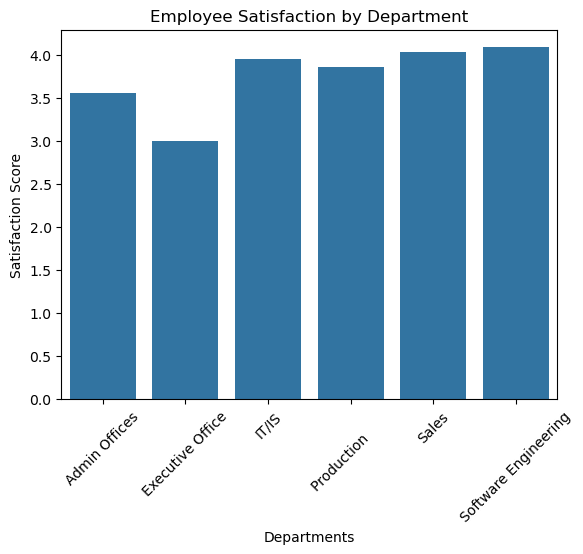

In [37]:

sns.barplot(data= depart_avg, x= "Department", y= "EmpSatifaction_mean")
plt.xlabel('Departments')
plt.ylabel('Satisfaction Score')
plt.title('Employee Satisfaction by Department')
plt.xticks(rotation=45)
plt.show()

In [43]:
#Filter by manager for satifaction score 
manager_avg = satisfaction.groupby(['Department','ManagerName']).agg({'EmpSatisfaction' : ['mean']})
manager_avg

EmpSatisfaction
                                                   mean
Department           ManagerName                       
Admin Offices        Board of Directors        3.000000
                     Brandon R. LeBlanc        3.571429
                     Janet King                4.000000
Executive Office     Board of Directors        3.000000
IT/IS                Brian Champaigne          4.000000
                     Eric Dougall              3.500000
                     Janet King                5.000000
                     Jennifer Zamora           4.500000
                     Peter Monroe              3.928571
                     Simon Roup                3.823529
Production           Amy Dunn                  3.809524
                     Brannon Miller            3.409091
                     David Stanley             3.952381
                     Elijiah Gray              3.954545
                     Janet King                3.466667
                     Kelley Spirea             3.818182
                     Ketsia Liebig             4.095238
                     Kissy Sullivan            3.909091
                     Michael Albert            4.045455
                     Webster Butler            4.047619
Sales                Debra Houlihan            4.333333
                     Janet King                4.000000
                     John Smith                3.928571
                     Lynn Daneault             4.076923
Software Engineering Alex Sweetwater           4.222222
                     Janet King                4.000000
                     Jennifer Zamora           3.000000

In [44]:
manager_avg.columns = ["EmpSatifaction_mean"]

C:\Users\since\AppData\Local\Temp\ipykernel_42444\4217004922.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Manager')


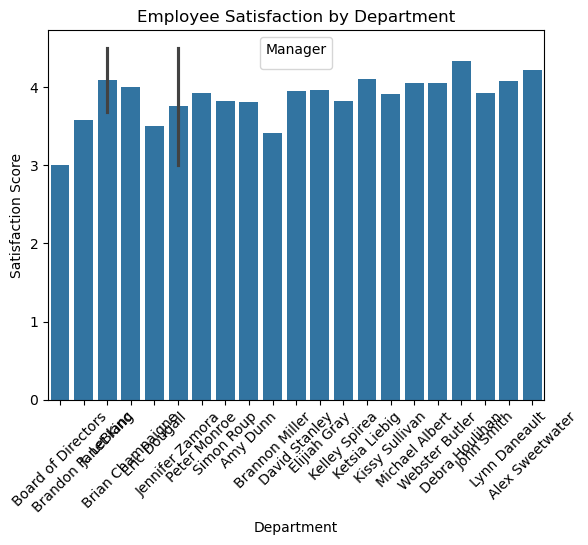

In [47]:
sns.barplot(data= manager_avg, x= "ManagerName", y= "EmpSatifaction_mean")
plt.title('Average Employee Satisfaction by Department and Manager')
plt.xlabel('Department')
plt.ylabel('Satisfaction Score')
plt.title('Employee Satisfaction by Department')
plt.xticks(rotation=45)
plt.legend(title='Manager')
plt.show()

#sns.barplot(data=manager_avg, x='Department', y='EmpSatisfaction_mean', )
#plt.title('Average Employee Satisfaction by Department and Manager')
#plt.xlabel('Department')
#plt.ylabel('Average Satisfaction')
#plt.xticks(rotation=45)

#plt.tight_layout()
#plt.show()

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=manager_avg, x='ManagerName', y='EmpSatisfaction_mean', hue='Department', palette='Set2')
plt.title('Average Employee Satisfaction by Manager (Colored by Department)')
plt.xlabel('Manager')
plt.ylabel('Average Satisfaction')
plt.xticks(rotation=45)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `EmpSatisfaction_mean` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

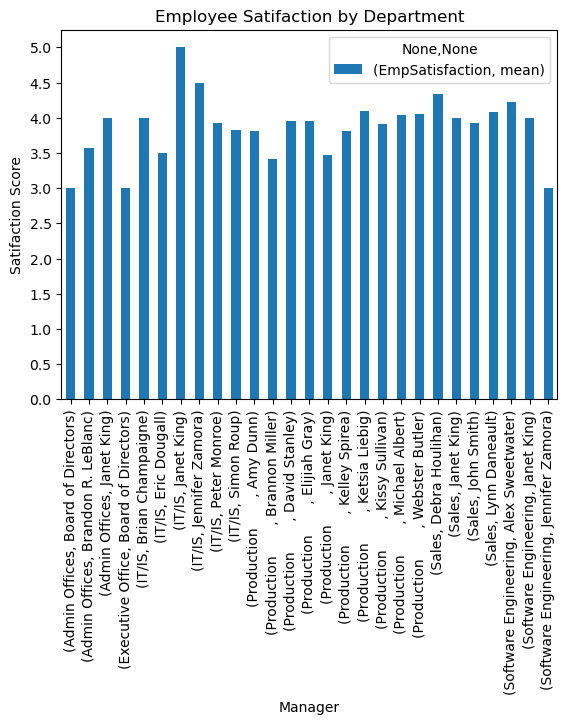

In [14]:
manager_avg.plot(kind= "bar")
plt.xlabel('Manager')
plt.ylabel('Satifaction Score')
plt.title('Employee Satifaction by Department')
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()

In [ ]:
satisfaction[satisfaction["Termd"]] == 1)

SyntaxError: unmatched ')' (61550191.py, line 2)

In [ ]:
terminated_only = satisfaction[satisfaction["Termd"] == 1]


plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='RecruitmentSource', y='Rate', hue='Status', palette='Set2')
plt.title('Retention vs Termination Rates by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()